<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Constantes de movimiento del sistema solar</center></b><h3>
<h5><center><b>Asignada</b>: 15 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 29 de Agosto de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Sebastián Numpaque
<br/>
<b>Cédula</b>: 100239690
<br/>
<b>Última actualización</b>: Agosto 24, 2023
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba los resultados vistos en clase sobre las constantes en el problema de los N-cuerpos, en este caso aplicados al sistema solar.  Para ello usaremos el sistema de datos del JPL Horizons y el paquete `astroquery`.

**Procedimiento**:

Para conseguir el objetivo:

1. Obtener las masas, posiciones y velocidades de los planetas del sistema solar (8 planetas) y del Sol durante 20 años (por ejemplo entre 2000 y 2020), cada 3 meses. Use para ello Astroquery y SPICE (para las masas).

2. Para cada punto en el tiempo calcular:

   - El momentum lineal de cada cuerpo.
   - El momentum angular de cada cuerpo.
   - La energía cinética de cada cuerpo.
   - La energía potencial gravidtacional de todo el sistema.

3. Usando el valor de cada una de las cantidades anteriores vamos a calcular el valor de las cuadraturas del sistema:

   - Calcular el momentum lineal total (3 cuadraturas).
   - Calcular el momentum angular total (3 cuadraturas).
   - Calcular la energía total total (1 cuadratura).

   Es muy importante tener en cuenta que el valor de cada una de las cuadraturas puede ser inmenso (las masas del sistema solar son inmensas). Por lo tanto, debemos dividir cada cuadratura por el valor característico de. para ello calcule el valor promedio del momentum lineal, angular y energía cinética del Sol.

4. Hacer gráficos de las 10 cuadraturas.

5. El momentum angular total del sistema solar define el Plano de Laplace del sistema. El momentum angular de cada uno de los cuerpos del sistema solar define la inclinación de la órbita osculatriz del cuerpo respecto al plano de Laplace. Calcular, para cada tiempo, el ángulo entre el plano de Laplace y la órbita osculatriz de cada cuerpo (incluyendo el Sol).

Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

6. Haga un gráfico del ángulo de la órbita osculatriz de cada cuerpo como función del tiempo.

7. Calcule el valor promedio de la inclinación orbital de cada planeta en grados respecto al plano invariante de Laplace.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráfico de las 10 cuadraturas normalizadas (divididas por el valor para el Sol).

  - Gráfico de la inclinación de la órbita osculatriz de cada planeta y el Sol.

- Datos mínimos:
  - Valor de la inclinación orbital de cada planeta

- Gráficos opcionales:
  - Gráfico de las órbitas de los planetas.
  - Gráfico de las magnitudes del momentum lineal y angular total como función del tiempo.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.



---



#**Solución**

In [1]:
! pip install -q pymcel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 62.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy import constants
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spiceypy as spice
import pandas as pd

#**Ejercicio 1**

In [3]:
#Id de los cuerpos
planets_id = np.array([10] + [i for i in range (199,900,100)])
planets = np.array(["Sol","Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno"])

In [4]:
def consultar_vectores(ids): #Funcion que consulta los vectores de estado con el sistema Horizons
  resultados_r = []
  resultados_v = []

  for id_ in ids:
    objeto = Horizons(id=id_, location='@0', epochs={'start':'2000-01-01', 'stop':'2020-01-01', 'step': '90d'}).vectors().to_pandas() #Approx 3 months = 90 days
    r_objeto = np.array(objeto[['x', 'y', 'z']])*constants.au.value
    v_objeto = np.array(objeto[['vx', 'vy', 'vz']])*constants.au.value/86400
    resultados_r.append(r_objeto)
    resultados_v.append(v_objeto)

  return np.array(resultados_r), np.array(resultados_v)

r_planets, v_planets = consultar_vectores(planets_id)

In [5]:
#Funcion que produce un arreglo que contiene todas las fechas en un intervalo dado
fechas = pd.date_range(start = pd.to_datetime("2000-01-01"), end = pd.to_datetime("2020-01-01"), freq="90d").to_list()

#Posiciones y Velocidades de la Tierra en cada fecha
#Puede cambiar la tabla para el planeta deseado cambiando el indice de r_planets y v_planets
pd.DataFrame(np.concatenate((r_planets[3], v_planets[3]), axis = 1), columns = ["X (m)", "Y (m)", "Z (m)","Vx (m/s)", "Vy (m/s)", "Vz (m/s)"],
             index = fechas)

,X (m),Y (m),Z (m),Vx (m/s),Vy (m/s),Vz (m/s)
2000-01-01,-2.627904e+10,1.445102e+11,3.025245e+07,-29830.528034,-5220.465675,-0.101486
2000-03-31,-1.479023e+11,-2.796934e+10,2.974858e+07,4990.839103,-29413.584876,0.863527
2000-06-29,1.911155e+10,-1.513660e+11,2.831066e+07,29067.835079,3791.958390,-0.988070
2000-09-27,1.487368e+11,1.027567e+10,2.515927e+07,-2645.980121,29601.682931,-0.911673
2000-12-26,-1.227673e+10,1.459396e+11,2.294794e+07,-30179.866382,-2462.719432,0.790499
...,...,...,...,...,...,...
2018-12-22,3.787655e+08,1.482624e+11,-1.530787e+07,-30275.073497,-13.001867,-0.548281
2019-03-22,-1.492205e+11,-9.959113e+08,-5.938558e+06,-76.992149,-29882.864495,1.473446
2019-06-20,-5.226326e+09,-1.507909e+11,3.876070e+06,29262.850266,-1078.269484,1.441153
2019-09-18,1.492320e+11,-1.319561e+10,5.219676e+05,2345.597419,29529.628738,-1.391456


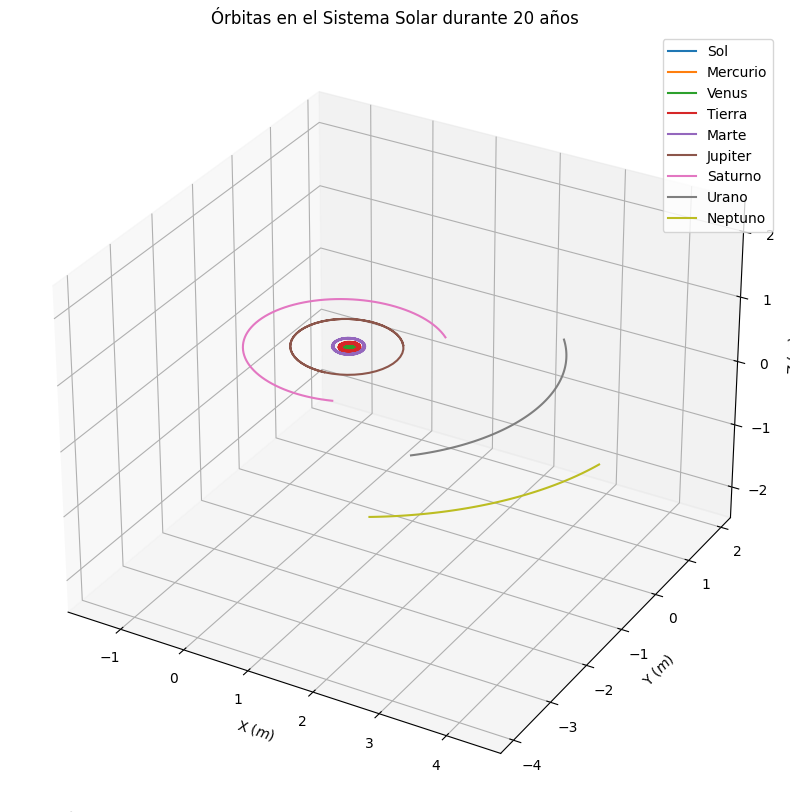

In [6]:
#Grafico
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(planets)):
  ax.plot(r_planets[i][:,0], r_planets[i][:,1], r_planets[i][:,2], label=planets[i])

ax.set_title('Órbitas en el Sistema Solar durante 20 años')
ax.set_xlabel('X ($m$)')
ax.set_ylabel('Y ($m$)')
ax.set_zlabel('Z ($m$)')
ax.legend()
ax.grid(True)
ax.axis("equal")
plt.show()

In [7]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc #Kernel de Spice

--2023-09-07 18:23:35--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: ‘gm_de440.tpc’

gm_de440.tpc        100%[===================>]  12.41K  --.-KB/s    in 0s      

2023-09-07 18:23:35 (208 MB/s) - ‘gm_de440.tpc’ saved [12708/12708]



In [8]:
#Datos de Spice
spice.furnsh('gm_de440.tpc')
m_planets = np.zeros(9)

#Se obtienen las masas de los cuerpos del Kernel
for i in range(9):
  m_planets[i] = spice.bodvrd(f"{planets_id[i]}","GM",1)[1][0] *1e9/constants.G.value

In [9]:
pd.DataFrame(m_planets, columns = ["M (Kg)"], index = planets)

,M (Kg)
Sol,1.988410e+30
Mercurio,3.301001e+23
Venus,4.867306e+24
Tierra,5.972168e+24
Marte,6.416909e+23
Jupiter,1.898125e+27
Saturno,5.683174e+26
Urano,8.680987e+25
Neptuno,1.024093e+26




---



#**Ejercicio 2**

In [ ]:
#Calculos de las cuadraturas

P_planets = []
L_planets = []
K = []

for i in range(9): #Momentum Lineal, Angular y Energia Cinetica en sus tres componentes para cada fecha
  P_planets.append(m_planets[i]*v_planets[i])
  L_planets.append(np.cross(r_planets[i], P_planets[i], axis = 1))
  K.append(0.5*m_planets[i]*(np.linalg.norm(v_planets[i], axis = 1)**2))

K = np.array(K)
P_planets = np.array(P_planets)
L_planets = np.array(L_planets)

U = 0
for i in range(9): #Energia potencial en cada fecha
    for j in range(9):
      if j != i:
        r_ij = np.linalg.norm(r_planets[i]-r_planets[j], axis = 1)
        mu_j = constants.G.value*m_planets[j]
        U += m_planets[i]*mu_j/r_ij
U *= -0.5

In [ ]:
t_list = np.arange(82) #Lista de tiempos para los gráficos. La unidad de tiempo es 3 meses

In [ ]:
#Momentum Lineal de la Tierra en cada fecha
#Puede cambiar el cuerpo en el indice de P_planets para mostrar sus valores respectivos
pd.DataFrame(P_planets[3], index = fechas, columns = ["Px (Kg m/s)", "Py (Kg m/s)", "Pz (Kg m/s)"])

,Px (Kg m/s),Py (Kg m/s),Pz (Kg m/s)
2000-01-01,-1.781529e+29,-3.117750e+28,-6.060891e+23
2000-03-31,2.980613e+28,-1.756629e+29,5.157131e+24
2000-06-29,1.735980e+29,2.264621e+28,-5.900921e+24
2000-09-27,-1.580224e+28,1.767862e+29,-5.444667e+24
2000-12-26,-1.802392e+29,-1.470778e+28,4.720996e+24
...,...,...,...
2018-12-22,-1.808078e+29,-7.764934e+25,-3.274428e+24
2019-03-22,-4.598101e+26,-1.784655e+29,8.799668e+24
2019-06-20,1.747627e+29,-6.439607e+27,8.606807e+24
2019-09-18,1.400830e+28,1.763559e+29,-8.310008e+24


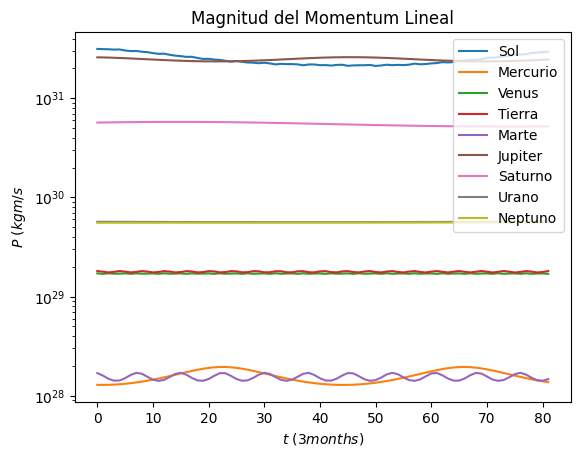

In [ ]:
for i in range(9):
  plt.plot(t_list, np.linalg.norm(P_planets[i], axis = 1), label = planets[i])

plt.title("Magnitud del Momentum Lineal")
plt.ylabel("$P$ $(kgm /s$")
plt.xlabel("$t$ ($3 months$)")
plt.yscale("log")
plt.legend()

In [ ]:
#Momentum Angular de la Tierra en cada fecha
#Puede cambiar el planeta en el indice de L_planets
pd.DataFrame(L_planets[3], index = fechas, columns = ["Lx (kg·m²/s)", "Ly (kg·m²/s)", "Lz (kg·m²/s)"])

,Lx (kg·m²/s),Ly (kg·m²/s),Lz (kg·m²/s)
2000-01-01,8.556098e+35,-5.405491e+36,2.656423e+40
2000-03-31,5.081479e+36,1.649441e+36,2.681460e+40
2000-06-29,2.520695e+35,5.027450e+36,2.670964e+40
2000-09-27,-4.503761e+36,4.122494e+35,2.645700e+40
2000-12-26,1.026494e+36,-4.078161e+36,2.648461e+40
...,...,...,...
2018-12-22,-4.866632e+35,2.769023e+36,2.680698e+40
2019-03-22,-1.068591e+36,1.315822e+36,2.663026e+40
2019-06-20,-1.272868e+36,7.223743e+35,2.638627e+40
2019-09-18,1.760353e+34,1.247431e+36,2.650280e+40


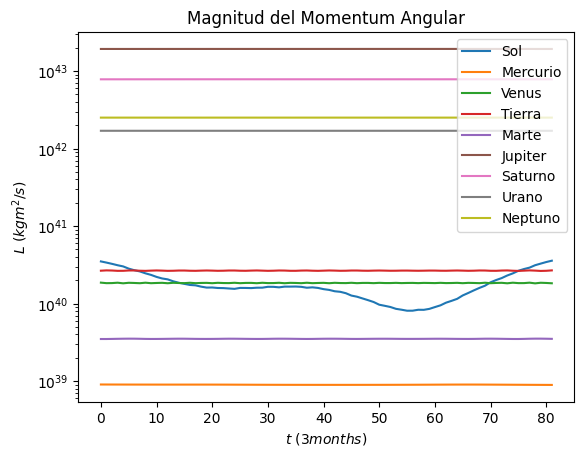

In [ ]:
for i in range(9):
  plt.plot(t_list, np.linalg.norm(L_planets[i], axis = 1), label = planets[i])

plt.title("Magnitud del Momentum Angular")
plt.ylabel("$L$ ($kgm^2 /s$)")
plt.xlabel("$t$ ($3 months$)")
plt.yscale("log")
plt.legend()

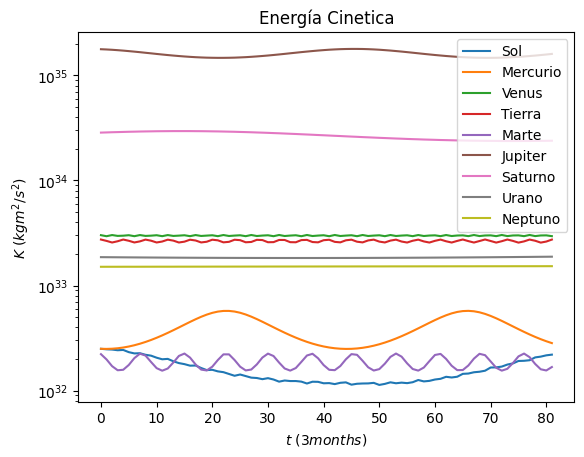

In [ ]:
for i in range(9):
  plt.plot(t_list, K[i], label = planets[i])

plt.legend()
plt.title("Energía Cinetica")
plt.ylabel("$K$ $(kgm^2 /s^2)$")
plt.xlabel("$t$ ($3 months$)")
plt.yscale("log")

Text(0.5, 0, '$t$ ($3 months$)')

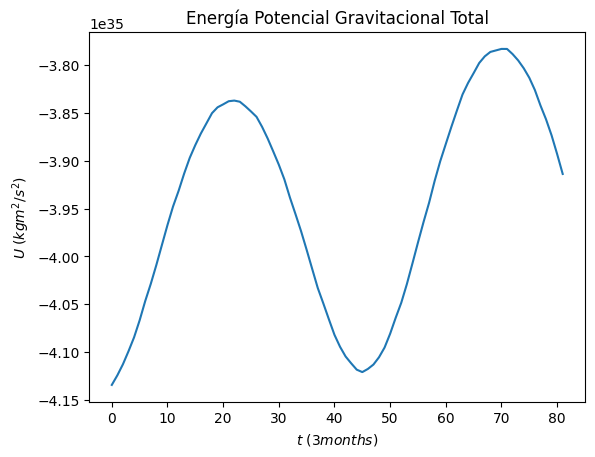

In [ ]:
plt.plot(t_list, U)
plt.title("Energía Potencial Gravitacional Total")
plt.ylabel("$U$ $(kgm^2 /s^2)$")
plt.xlabel("$t$ ($3 months$)")



---



#**Ejercicio 3 y 4**

Text(0, 0.5, '$\\bar{P}$')

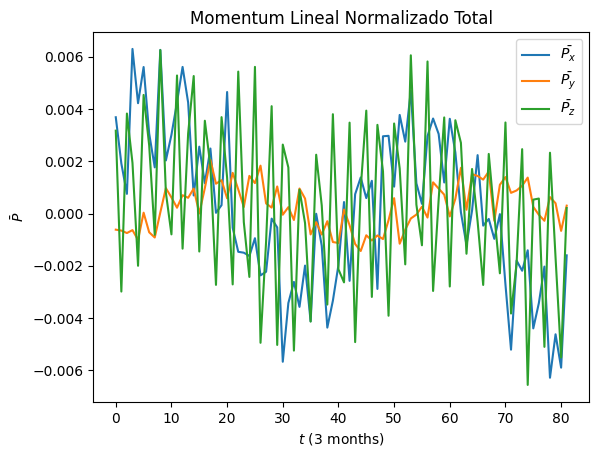

In [ ]:
P_tot = np.sum(P_planets, axis = 0)
P_sol = np.mean(P_planets[0], axis = 0)

labels = ["$\\bar{P_x}$", "$\\bar{P_y}$", "$\\bar{P_z}$"]

for i in range(3):
  plt.plot(t_list, P_tot[:,i]/P_sol[i], label = labels[i]) #Normalización de cada una de las componentes con respecto al Momentum del Sol

plt.legend()
plt.title("Momentum Lineal Normalizado Total")
plt.xlabel("$t$ (3 months)")
plt.ylabel("$\\bar{P}$")

Text(0, 0.5, '$\\bar{L}$')

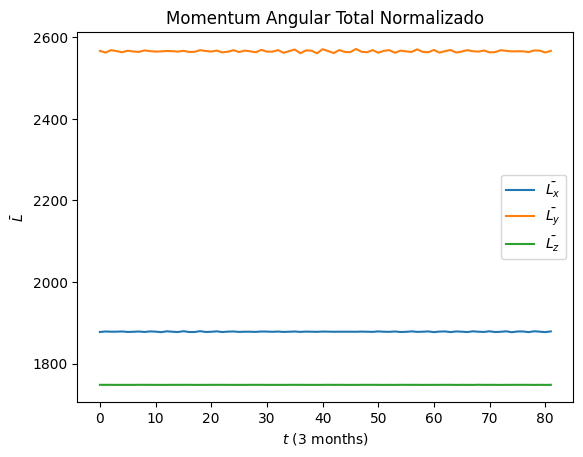

In [ ]:
L_tot = np.sum(L_planets, axis = 0)
L_sol = np.mean(L_planets[0], axis = 0)

labels = ["$\\bar{L_x}$", "$\\bar{L_y}$", "$\\bar{L_z}$"]

for i in range(3):
  plt.plot(t_list, L_tot[:,i]/L_sol[i], label = labels[i])#Normalización de cada una de las componentes con respecto al Momentum del Sol

plt.legend()
plt.title("Momentum Angular Total Normalizado")
plt.xlabel("$t$ (3 months)")
plt.ylabel("$\\bar{L}$")

Text(0, 0.5, '$\\bar{E}$')

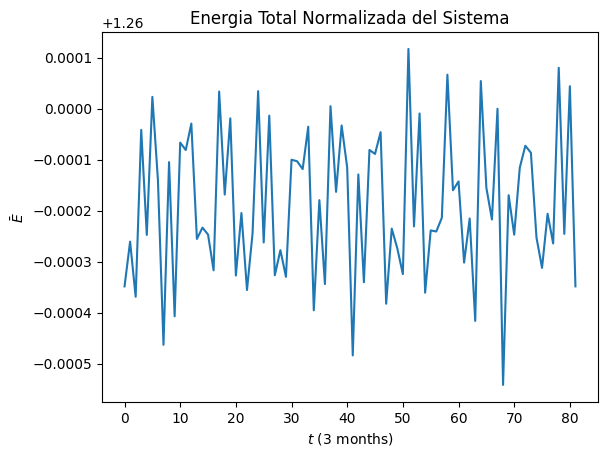

In [ ]:
K_tot = np.sum(K, axis = 0)
K_sol = np.mean(K[0])

#Normalización respecto a la energía cinética del Sol
plt.plot(t_list, (K_tot + U)/(K_sol*-1e3))
plt.title("Energia Total Normalizada del Sistema")
plt.xlabel("$t$ (3 months)")
plt.ylabel("$\\bar{E}$")



---



#**Ejercicio 5, 6 y 7**

In [ ]:
#Calculo de las inclinaciones
inclinacion = []

for i in range(9):
  theta = np.rad2deg(np.arccos(np.sum(L_tot*L_planets[i], axis = 1)/(np.linalg.norm(L_tot, axis = 1)*np.linalg.norm(L_planets[i], axis = 1))))
  inclinacion.append(theta)

inclinacion = np.array(inclinacion)

In [ ]:
#Inclinación de la orbita osculatriz del Sol respecto al Plano de Laplace para cada fecha
#Puede cambiar el planeta en el indice de inclinación[]
pd.DataFrame(inclinacion[0], index = fechas, columns = ["Theta (°)"])

,Theta (°)
2000-01-01,0.109448
2000-03-31,0.103155
2000-06-29,0.102847
2000-09-27,0.069903
2000-12-26,0.067159
...,...
2018-12-22,0.172497
2019-03-22,0.142652
2019-06-20,0.105683
2019-09-18,0.105103


Text(0.5, 0, '$t$ (3 months)')

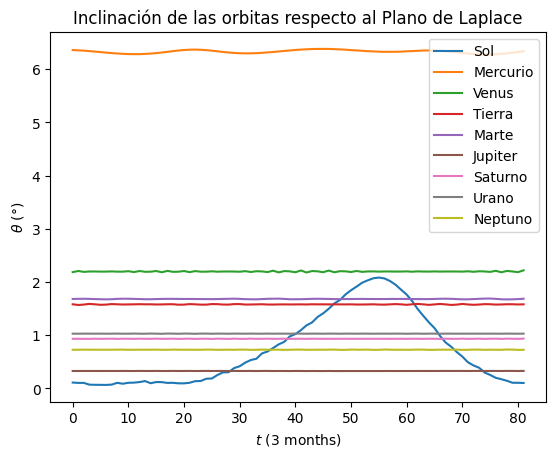

In [ ]:
for i in range(9):
  plt.plot(t_list,inclinacion[i], label = planets[i])

plt.legend()
plt.title("Inclinación de las orbitas respecto al Plano de Laplace")
plt.ylabel("$\\theta$ (°)")
plt.xlabel("$t$ (3 months)")

In [ ]:
pd.DataFrame(np.mean(inclinacion, axis = 1), index = planets, columns = ["Inclinacion promedio (rad)"])

,Inclinacion promedio (rad)
Sol,0.727113
Mercurio,6.327178
Venus,2.195865
Tierra,1.577970
Marte,1.679578
Jupiter,0.326756
Saturno,0.931948
Urano,1.028137
Neptuno,0.726459


#**Ejercicio 8 - Virial**

In [ ]:
#Valores promedios y normalizados para evitar un Virial alto
U_mean = np.mean(U)*1e-35
K_mean = np.mean(K_tot)*1e-35
V = 2*K_mean + U_mean

pd.DataFrame([U_mean, K_mean, V], index = ["<U>", "<K>", "V"], columns = ["Joules (1e35)"])

,Joules (1e35)
<U>,-3.941784
<K>,1.961878
V,-0.018028


Los valores de $\langle U\rangle$ y $\langle K \rangle$ difieren a partir del segundo decimal, por lo que si ambas cantidades tienen ordenes de $10^{35}$, su diferencia será del orden de $10^{33}$. Es por esto que se normalizan las cantidades para apreciar un mejor valor del *Virial*.